In [9]:
import ultralytics
ultralytics.checks()
import torch
import cv2
from ultralytics import YOLO
import os
from PIL import Image

Ultralytics YOLOv8.1.6 🚀 Python-3.10.9 torch-2.1.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 191.9/228.3 GB disk)


In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="Your_key")
rf.workspace().projects()
project = rf.workspace("perceptionia").project("pedestriandetection-idtcn")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.6, to fix: `pip install ultralytics==8.0.196`


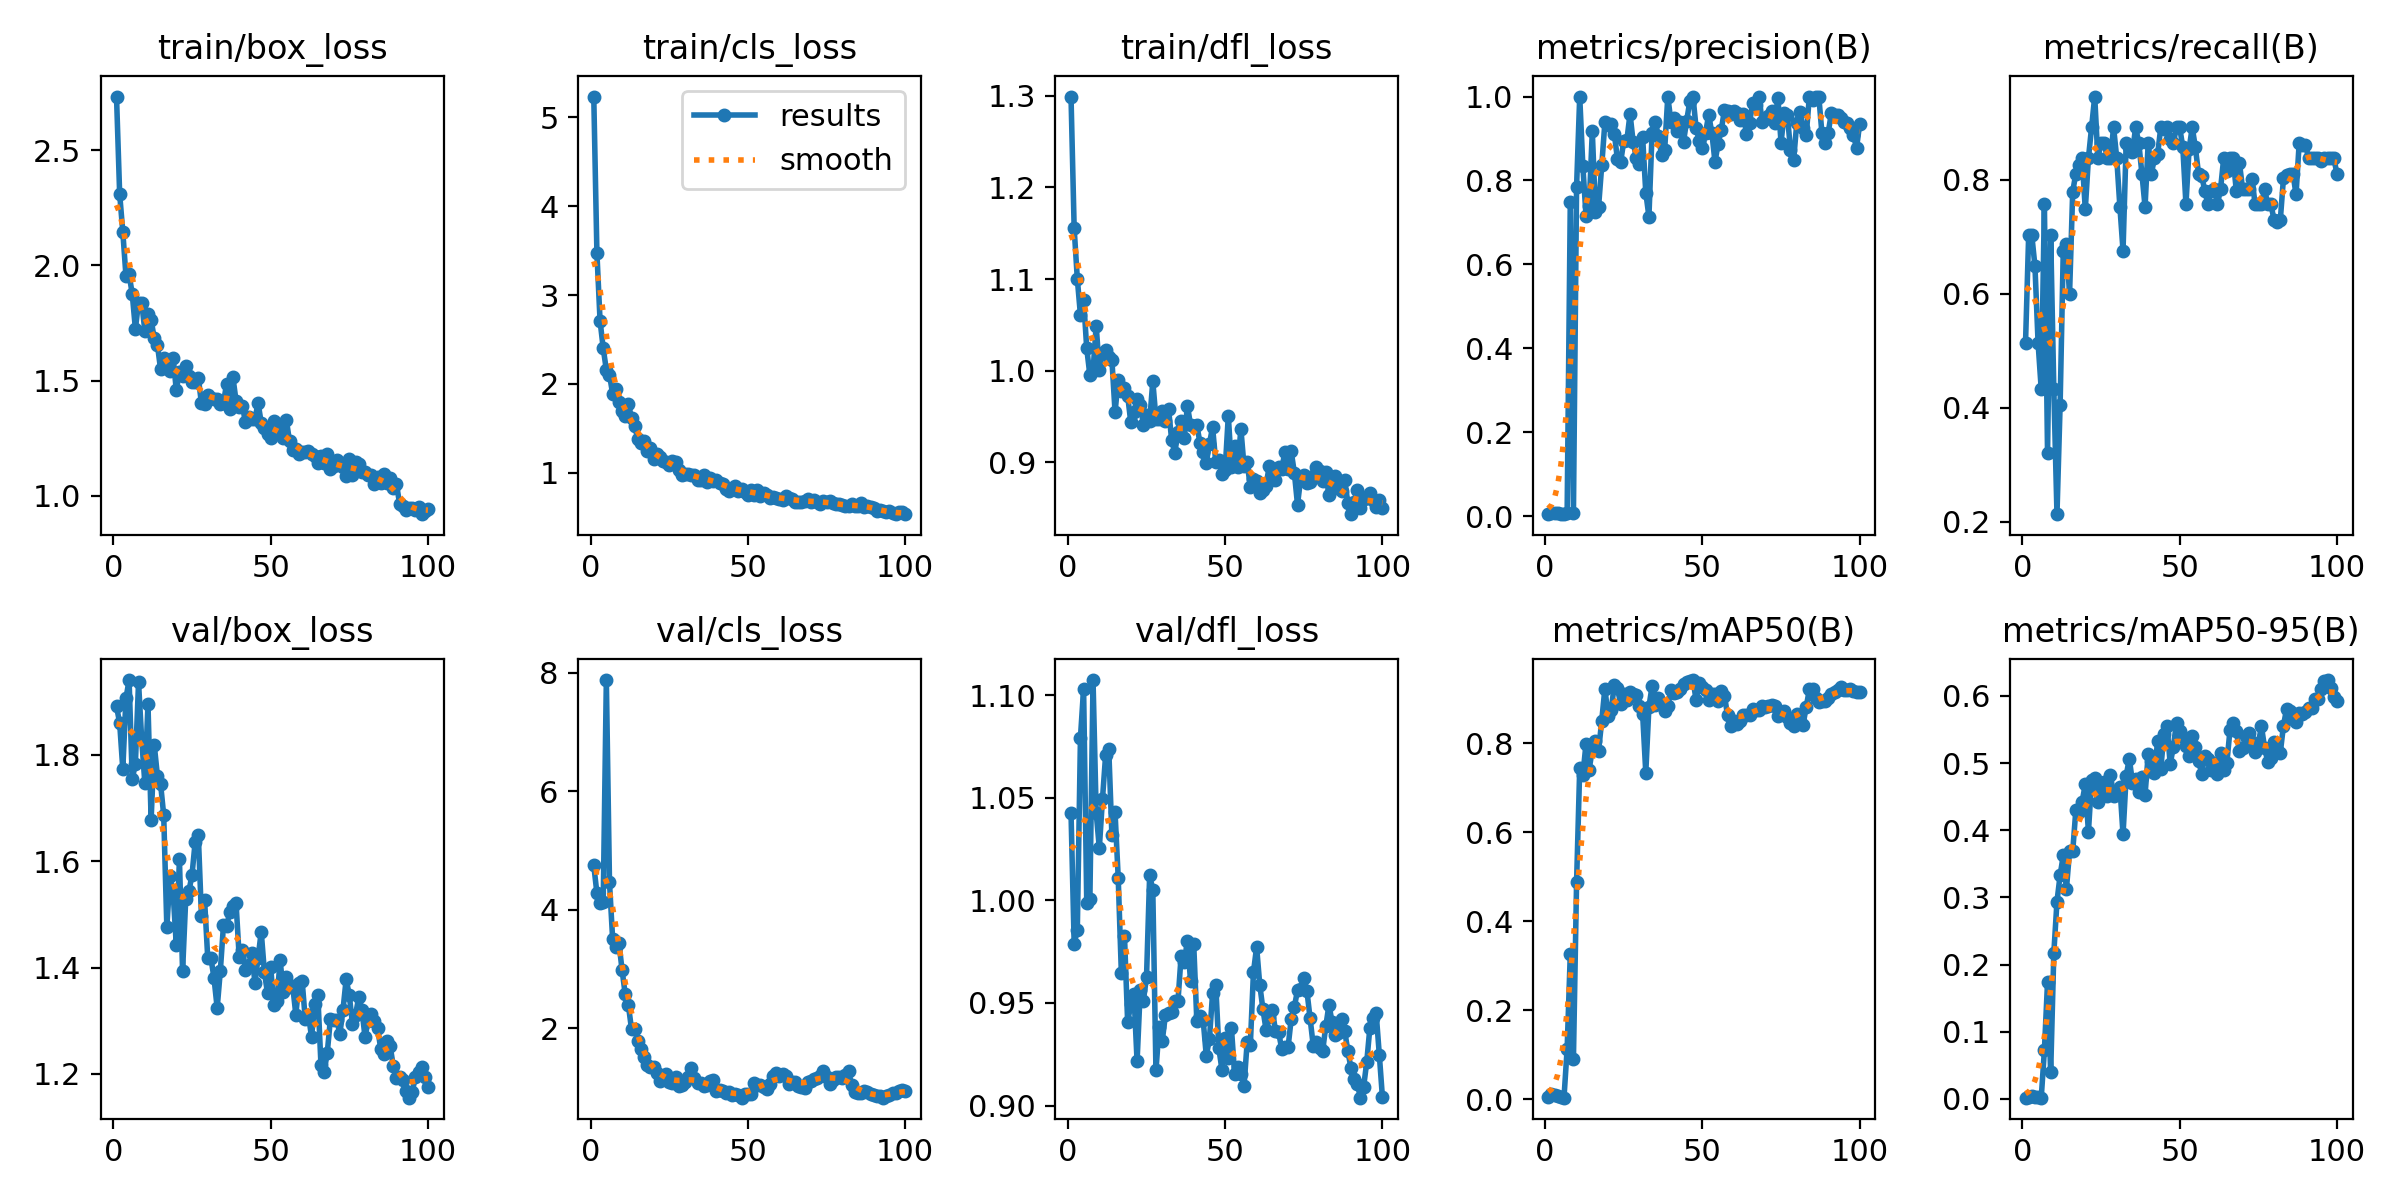

In [23]:
Image.open('./runs/detect/train/results.png')

In [10]:
class ObjectDetection:
  def __init__(self,dataset_path='./' ,datapath='./runs/detect/train'):
    self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print("Using device: ", self.device)
    self.model = self.load_model(datapath)
    self.datapath=datapath
    self.dataset_path=dataset_path
    
  def load_model(self, datapath):
    if os.path.exists(datapath):
      model = YOLO(datapath+'/weights/best.pt')
    else:
      model = YOLO('yolov8n.pt')
      model.train(data=self.dataset_path, epochs = 100,imgsz=640)
      model.export()
    return model
    
  
  def predict(self, frame):
    results = self.model(frame)
    return results
    
  def plot_bboxes(self, results, frame):
    xyxys=[]
    confidences=[]
    class_ids=[]

    for result in results:
      boxes = result.boxes.cpu().numpy()
      xyxys.append(boxes.xyxy)
      confidences.append(boxes.conf)
      class_ids.append(boxes.cls)
    return results[0].plot, xyxys, confidences, class_ids
  
  def plot_metrics(self):
      print(self.datapath)
      Image.open(self.datapath+'/results.png')
      Image.open(self.datapath+'/confusion_matrix.png')
  
  def inference_from_frames(self, images_folder):
    """inference from a folder that already contains every frame"""
    image_files = [f for f in os.listdir(images_folder) if f.endswith('.jpg')]

    for image_file in image_files:
        # Construct the full path to the PNG image
        image_path = os.path.join(images_folder, image_file)

        # Read the PNG image
        frame = cv2.imread(image_path)

        # Make predictions using the ObjectDetection class
        results = self.predict(frame)

        # Draw bounding boxes on the frame
        plot, xyxys, confidences, class_ids = self.plot_bboxes(results, frame)
        frame_with_boxes = plot()

        # Display the frame with bounding boxes
        cv2.imshow('Object Detection', frame_with_boxes)

        # Break the loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Close all OpenCV windows
    cv2.destroyAllWindows()
    
  def inference_from_video(self, video_path):
    cap = cv2.VideoCapture(video_path)

    while True:
        # Read a frame from the video
        ret, frame = cap.read()

        if not ret:
            break

        # Make predictions using the ObjectDetection class
        results = self.predict(frame)

        # Draw bounding boxes on the frame
        plot, xyxys, confidences, class_ids = self.plot_bboxes(results, frame)
        frame_with_boxes = plot()

        # Display the frame with bounding boxes
        cv2.imshow('Object Detection', frame_with_boxes)

        # Break the loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object
    cap.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()


In [11]:
images_folder = './test_frames'
dataset_path='PedestrianDetection-1/data.yaml'

In [12]:
obj_detection = ObjectDetection('./runs/detect/train')

Using device:  cpu


In [13]:
obj_detection.plot_metrics()

./runs/detect/train


In [14]:
obj_detection.inference_from_frames('./test_frames')


0: 544x640 1 humans, 129.2ms
Speed: 16.8ms preprocess, 129.2ms inference, 30.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 (no detections), 103.9ms
Speed: 4.1ms preprocess, 103.9ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 (no detections), 82.5ms
Speed: 3.3ms preprocess, 82.5ms inference, 0.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 (no detections), 174.0ms
Speed: 4.7ms preprocess, 174.0ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 (no detections), 285.4ms
Speed: 13.3ms preprocess, 285.4ms inference, 1.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 (no detections), 121.5ms
Speed: 6.1ms preprocess, 121.5ms inference, 0.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 (no detections), 83.5ms
Speed: 3.5ms preprocess, 83.5ms inference, 0.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 (no detections), 69.9ms
Speed: 2.8ms preprocess, 69

In [16]:
obj_detection.inference_from_video('./videos/ETH-Linthescher-raw.mp4')

0: 480x640 7 humanss, 124.6ms
Speed: 3.3ms preprocess, 124.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 7 humanss, 112.1ms
Speed: 1.7ms preprocess, 112.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 9 humanss, 94.4ms
Speed: 1.2ms preprocess, 94.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 8 humanss, 287.9ms
Speed: 2.5ms preprocess, 287.9ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 5 humanss, 185.9ms
Speed: 3.0ms preprocess, 185.9ms inference, 3.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 humanss, 166.0ms
Speed: 1.9ms preprocess, 166.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 humanss, 194.1ms
Speed: 2.9ms preprocess, 194.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 4 humanss, 141.0ms
Speed: 2.3ms preprocess, 141.0ms inference, 0.8ms postprocess per ima

: 